In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
import math as m 
import statistics as stats

In [3]:
import scipy.stats as ss

In [4]:
datos= pd.read_csv('EXAMEN TE.csv')

### Cargar datos

In [5]:
datos

,"Resultado de la clasificación no supervisada realizada en la superficie de trigo, en el ciclo de siembra otoño-invierno 1995-1996. Río Mayo, Sonora, México.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,CLUSTER,CANTIDAD DE PIXELES,VALOR ESPECTRAL MEDIO,NaN,NaN
1,NaN,NaN,TM2,TM3,TM4
2,1,254745,23.11,28.59,33.75
3,2,329174,21.59,23.58,43.6
4,3,280238,27.35,34.58,48.53
5,4,561113,20.93,21.18,53.75
6,5,748527,19.23,17.52,62.21
7,6,831918,17.98,14.92,70.4
8,7,691350,17.81,14.15,78.53
9,8,466315,17.66,13.52,86.26


### Mis datos solo corresponden a TM3 por ello extraemos dicha columna y la almacenamos en la variable "md"

In [6]:
md= datos[['Unnamed: 3']]
md

,Unnamed: 3
0,NaN
1,TM3
2,28.59
3,23.58
4,34.58
5,21.18
6,17.52
7,14.92
8,14.15
9,13.52


### Al cargar los datos se cargan las celdas sin valor y estas se interpretan como "NaN". Debemos eliminar estas para que no hagan ruido en los datos al igual que la celda con el encabezado de la columna que aparece como "TM3" 

In [7]:
md= md.drop([0,1,14,15,16,17],axis=0);
md

,Unnamed: 3
2,28.59
3,23.58
4,34.58
5,21.18
6,17.52
7,14.92
8,14.15
9,13.52
10,13.56
11,13.88


### Renombramos el encabezado de la columna como "TM3" ya que esto es importante para el calculo de la tabla de frecuencias 

In [8]:
md = md.rename(columns={'Unnamed: 3': 'TM3'})

In [9]:
md

,TM3
2,28.59
3,23.58
4,34.58
5,21.18
6,17.52
7,14.92
8,14.15
9,13.52
10,13.56
11,13.88


### Ordenamos los datos

In [30]:
md= md.sort_values('TM3').reset_index(inplace= False)

In [35]:
md= md.drop(['index'],axis=1)

In [36]:
md

,TM3
0,13.52
1,13.56
2,13.88
3,14.15
4,14.92
5,17.52
6,21.18
7,23.58
8,28.59
9,34.58


# Estimadores de tendencia central 

#### Medidas de tendecia central

In [12]:
md.describe();

### Media, mediana y moda 

In [13]:
md2 = pd.to_numeric(md['TM3'], downcast="float");

In [14]:
print('Total de datos:',md['TM3'].count())
print('Media:',stats.mean(md2))
print('Mediana:',stats.median(md2))
print('Moda:',stats.mode(md2))

Total de datos: 12
Media: 26.679166793823242
Mediana: 19.350000381469727
Moda: 13.520000457763672


##### Nota: a pesar de que la moda se muestra en el codigo, se sabe que ningun valor es identico por lo que se concluye que no hay moda 

### Desviación estandar y Variación

In [15]:
std = md2.std(ddof=1)
var = md2.var(ddof=1)
assert(np.sqrt(var) == std)
print('La desvación estandar es:',std)
print('La varianza es:',var)

La desvación estandar es: 18.026304
La varianza es: 324.94766


### Rango y rango intercuartilico

In [16]:
rango = md2.max() - md2.min()
iqr = md2.quantile(0.75) - md2.quantile(0.25)
print('El rango es:',rango)
print('El rango intercuartilico es:',iqr)

El rango es: 53.149998
El rango intercuartilico es: 16.005000829696655


### Coeficiente de variación

In [17]:
cv = md2.std(ddof=1) / md2.mean()
cv2 = ss.variation(md2)
print('El coeficiente de variación calculado manualmente es:',cv)
print('El coeficiente de variación usando un modulo es:',cv2)

El coeficiente de variación calculado manualmente es: 0.67566967
El coeficiente de variación usando un modulo es: 0.64690447


## Histograma 

#### 1. Hacemos la tabla de frecuencias

In [18]:
data= md[['TM3']]
pd.set_option('precision',8)
datos= data[:]
k= 1+3.332*m.log10(len(datos))
numero= int(k)
if numero % 2==0:
    periodos= m.ceil(k)
else:
    periodos= int(k)
    
inf= int(float(datos.min()))    
dif= int(float(datos.max()))
sup= int(float(datos.max())+1)

interv= pd.interval_range(
    start= inf,
    end= sup,
    periods= k,
    name= 'Intervalo',
    closed= 'left')

df= pd.DataFrame(index= interv)
df['FrecAbs']= pd.cut(md2,bins= df.index).value_counts()
df['Marca']= df.index.mid

In [19]:
df

,FrecAbs,Marca
Intervalo,,
"[13.0, 26.5)",8,19.75
"[26.5, 40.0)",2,33.25
"[40.0, 53.5)",0,46.75
"[53.5, 67.0)",2,60.25


D:\Conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


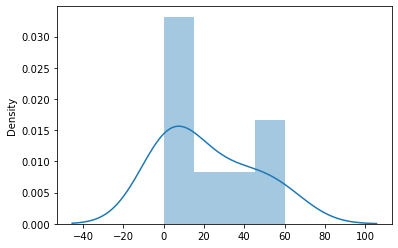

In [20]:
ax = sns.distplot(df, bins=4)

In [21]:
import matplotlib.pyplot as plot

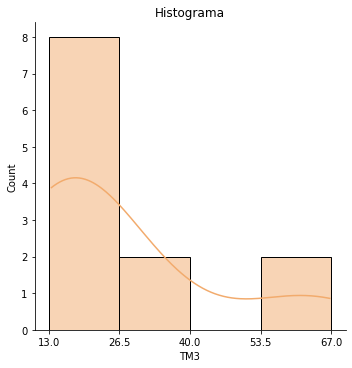

In [29]:
gfr = pd.Series(md2) # cargamos los datos en un objeto Series
intervalos = np.linspace(13, 67, 5)  # calculamos los extremos de los intervalos

sns.displot(md2, color='#F2AB6D', bins=intervalos, kde=True) #creamos el gráfico en Seaborn
 # generamos el histograma a partir de los datos
plot.xticks(intervalos)
plot.title('Histograma')

plot.show()